In [151]:
import pandas as pd
print("pandas imported successfully!")
import csv
df = pd.read_csv("./BrestCancer.csv")
print(df)

pandas imported successfully!
           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0  

In [152]:
print(df.columns)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


Seaborn imported successfully!
count id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64
Column: id, Outliers C

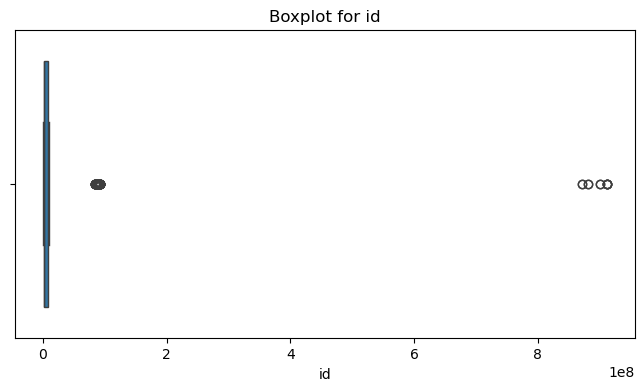

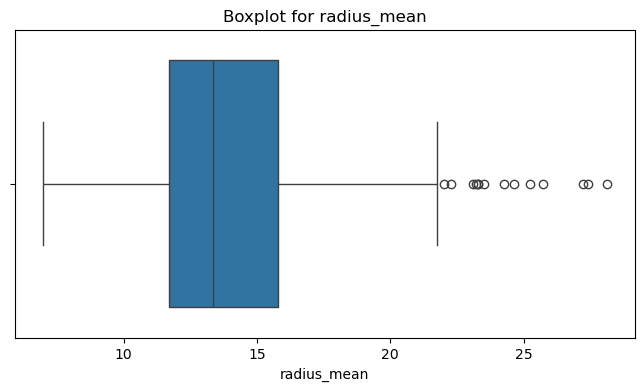

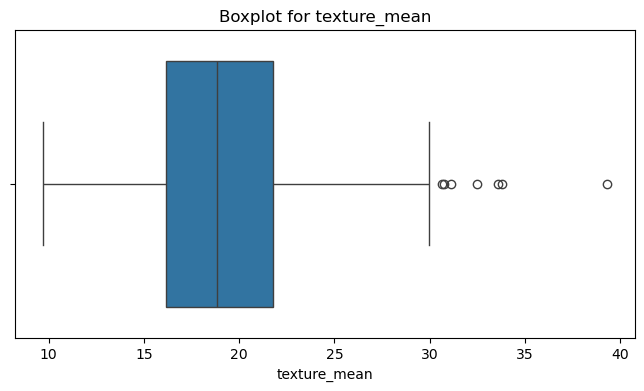

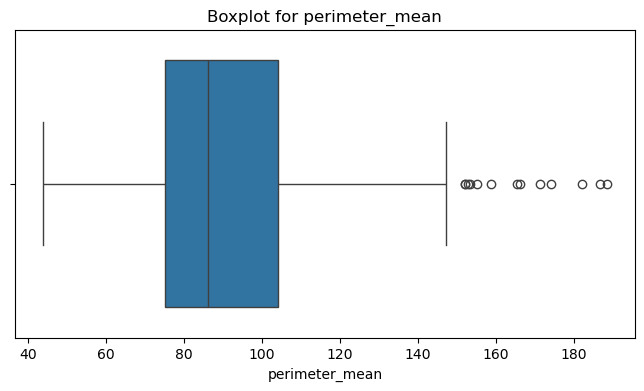

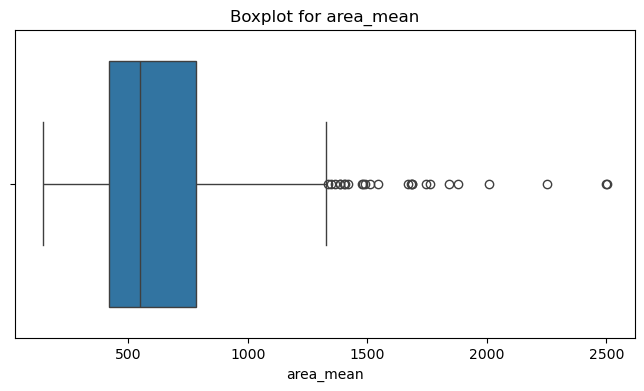

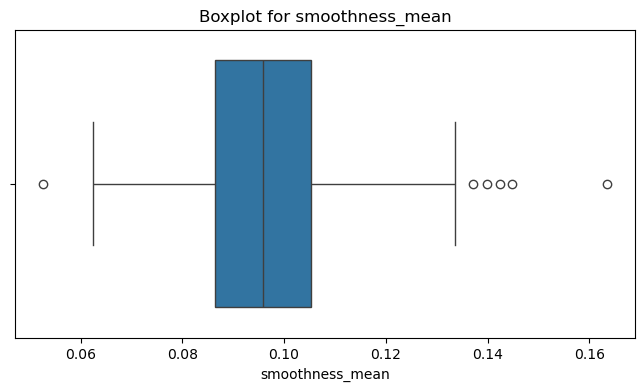

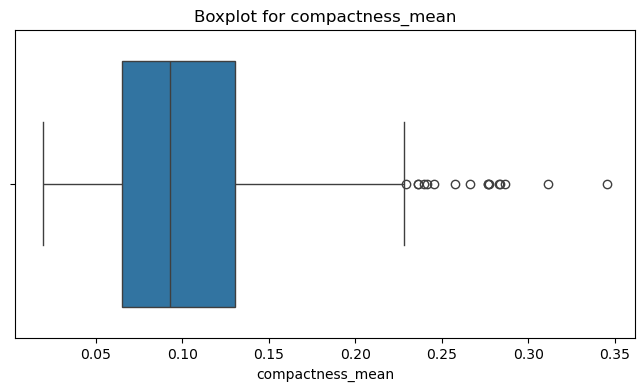

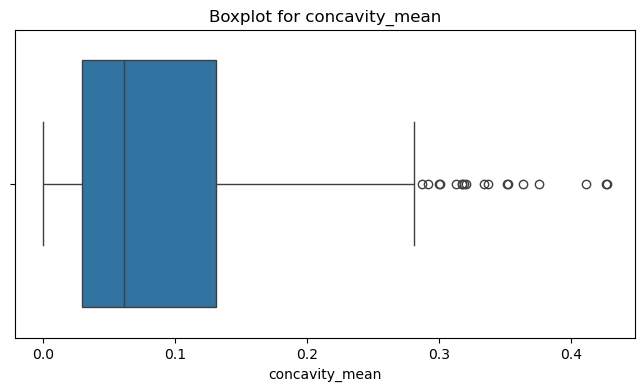

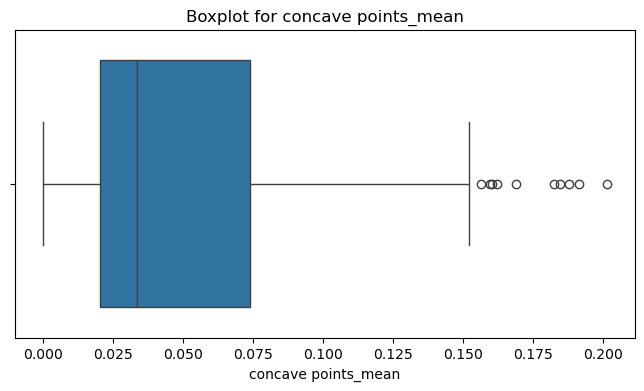

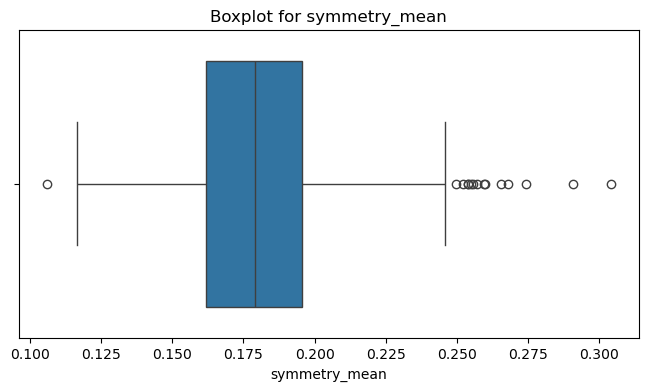

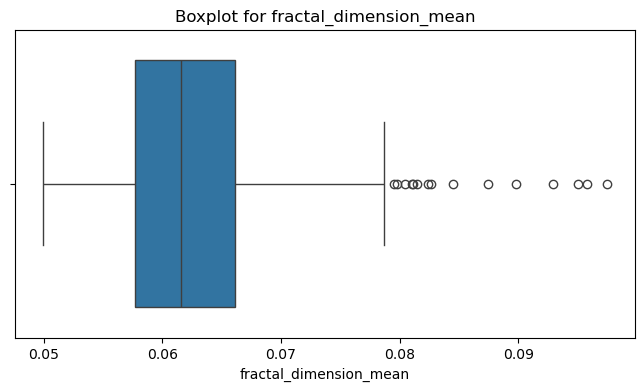

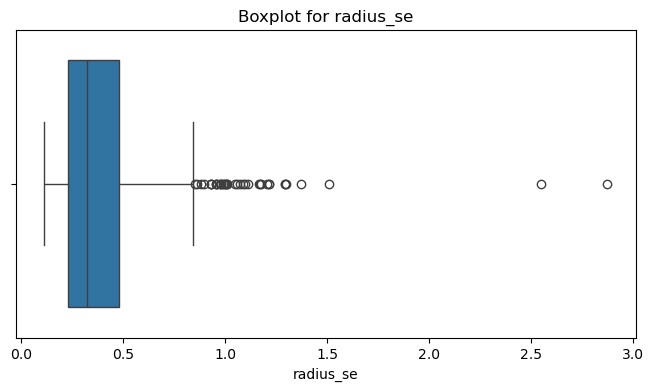

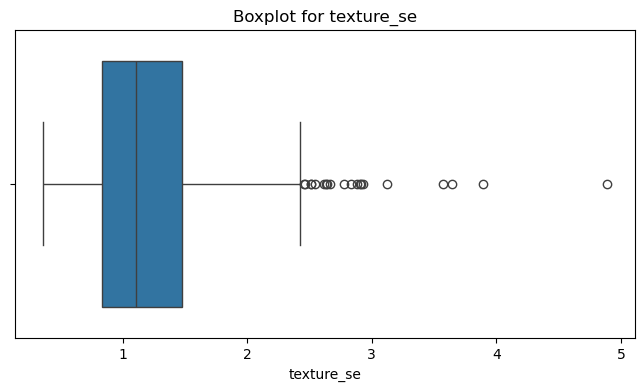

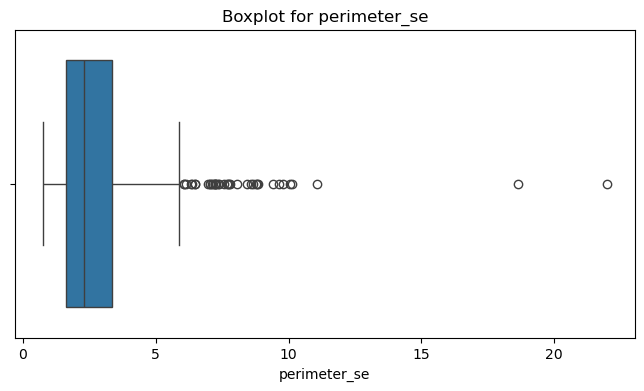

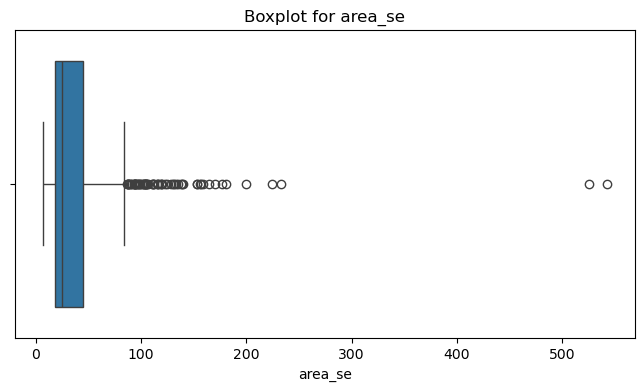

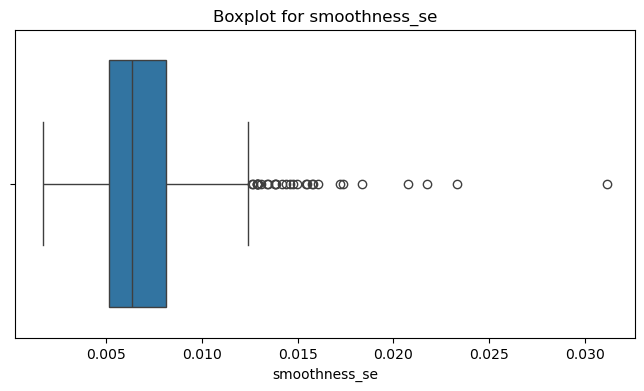

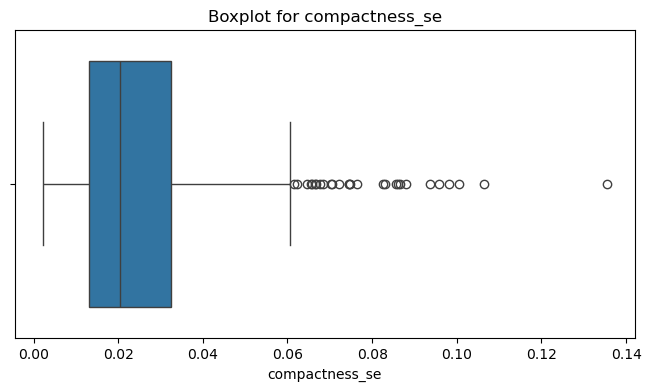

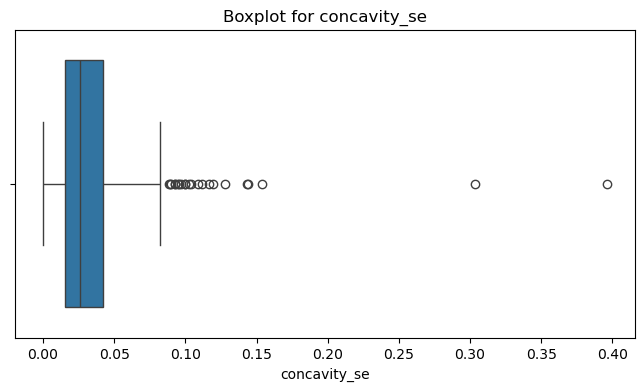

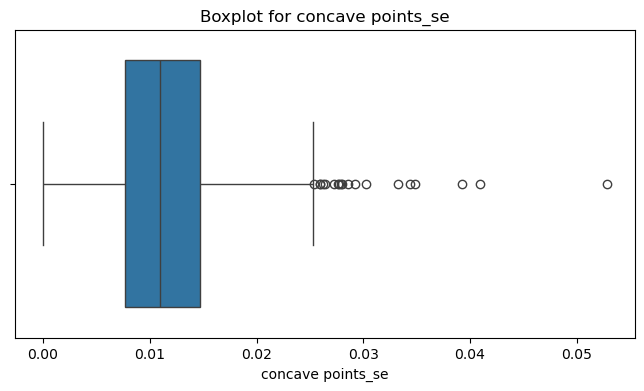

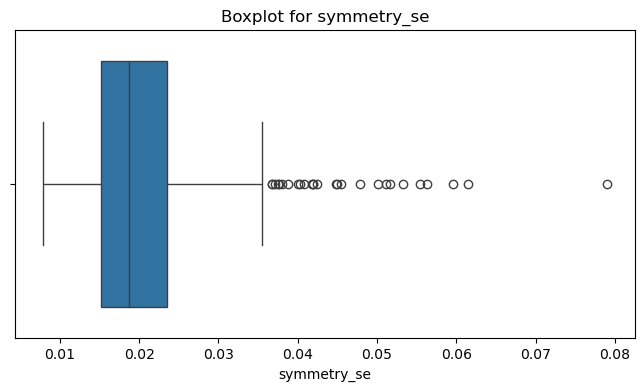

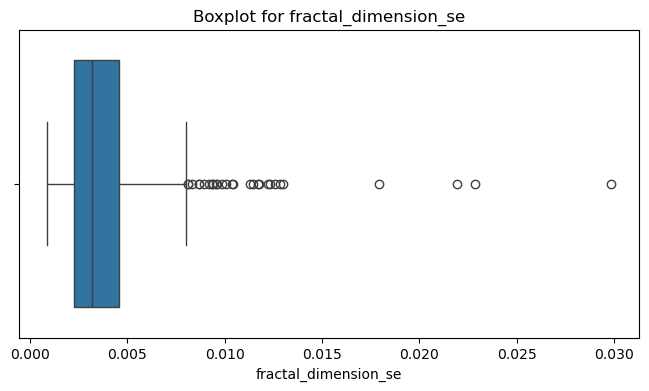

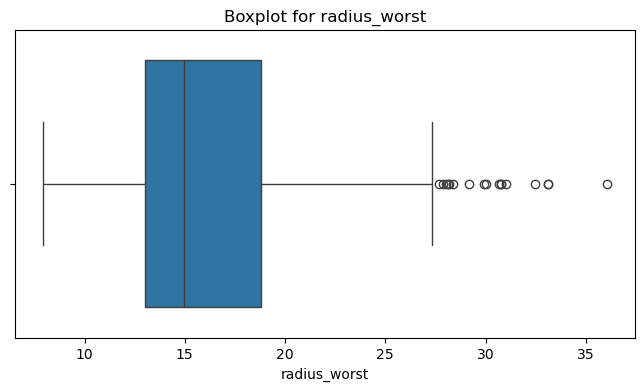

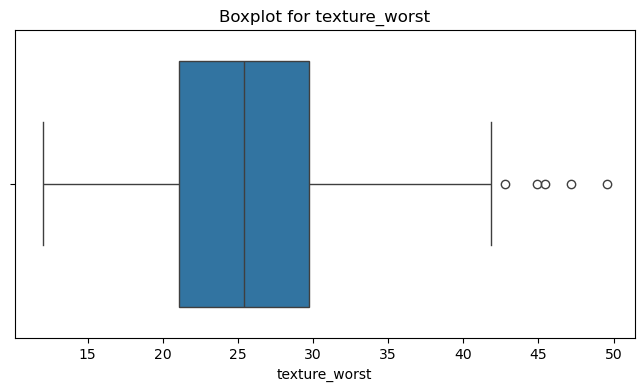

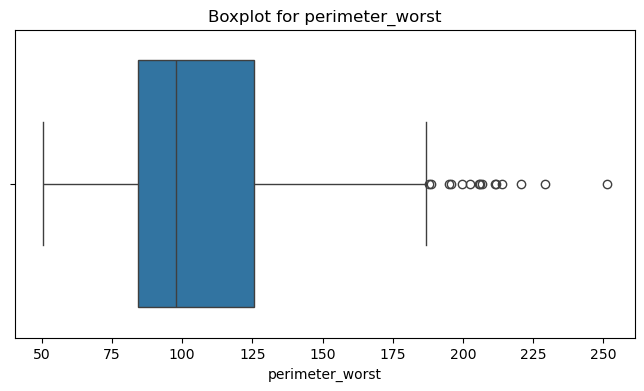

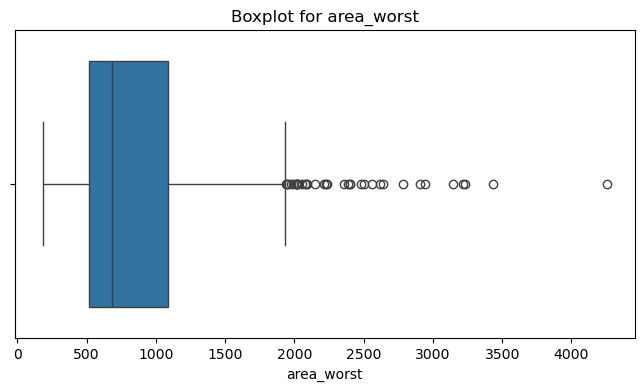

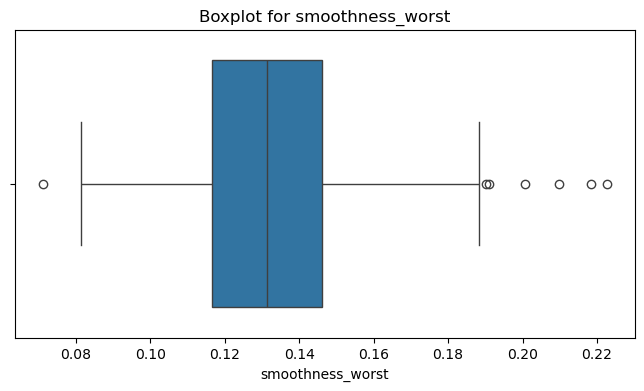

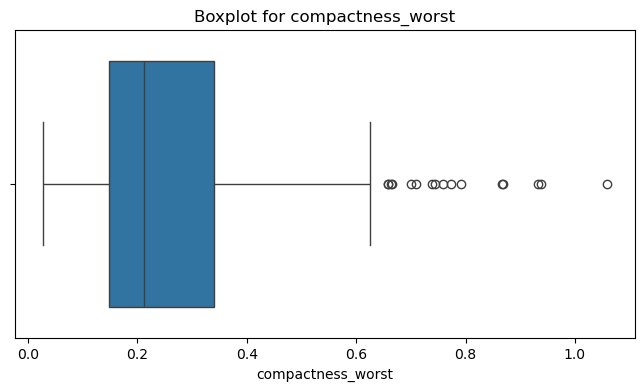

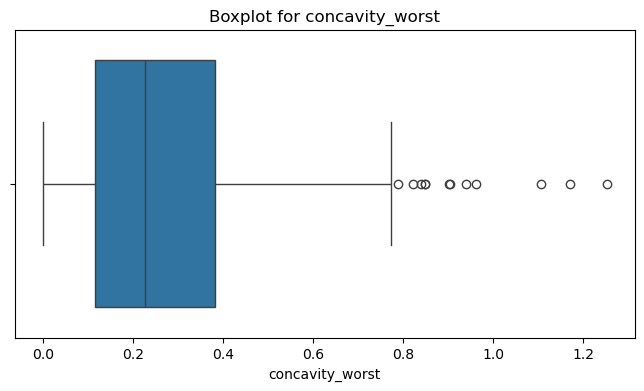

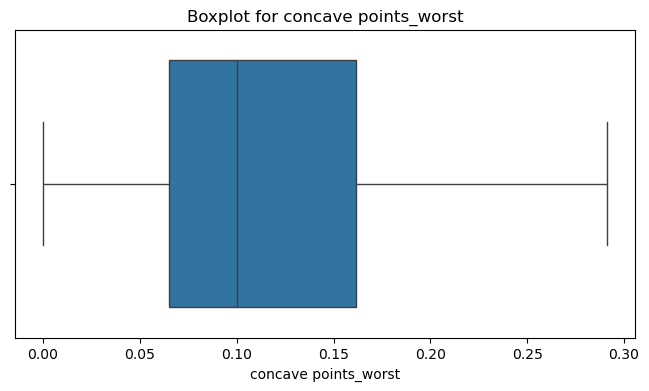

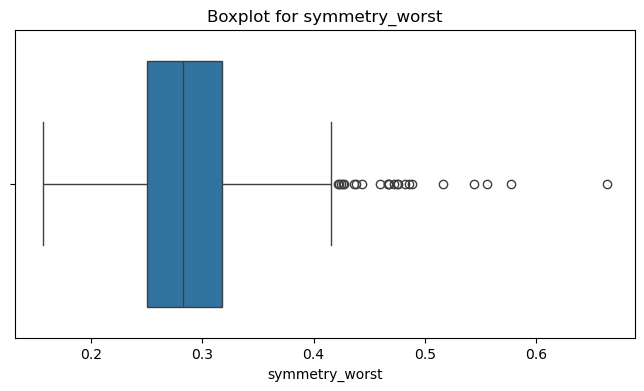

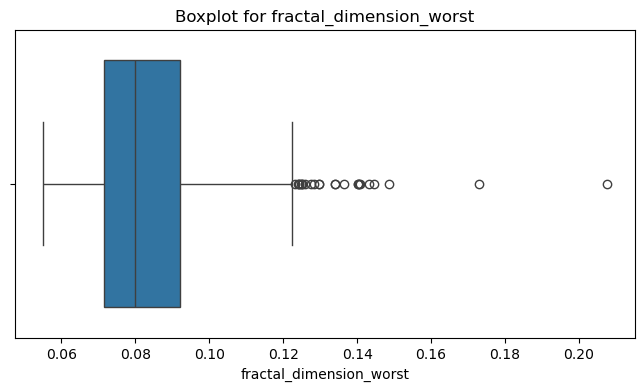

In [153]:
import matplotlib.pyplot as plt
import seaborn as sns
print("Seaborn imported successfully!")
from sklearn.preprocessing import MinMaxScaler, StandardScaler
# Step 1: Handle Missing Values
#print(df.isnull().sum())
# print(df.count())
# Choose ONE: Drop or Fill
# df.dropna(inplace=True)  # Drop rows with missing values
# print(df.count())
#df.fillna(df.mean(), inplace=True)  # Fill missing values with the column mean
outliers_dict = {}
print("count", df.isna().sum())

for column in df.select_dtypes(include=['float64', 'int64']).columns:

    mean = df[column].mean()
    std_dev = df[column].std()

    outliers = df[(df[column] < (mean - 3 * std_dev)) | (df[column] > (mean + 3 * std_dev))]
# print(outliers)
    outliers_dict[column] = outliers
    outliers_count = len(outliers)
    
    print(f"Column: {column}, Outliers Count: {outliers_count}")

for column in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[column])
    plt.title(f"Boxplot for {column}")
    plt.show()


In [154]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/Users/yannkeita/Desktop/CapstoneProject/BrestCancer_Cleaned.csv")
print("Dataset loaded successfully!")

df = df.drop(columns=["id"])

Dataset loaded successfully!


In [155]:
print(df.drop(columns=['diagnosis']).head())
print(df.drop(columns=['diagnosis']).describe())


   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0           

In [156]:
print(df.var())


diagnosis                            NaN
radius_mean                    12.418920
texture_mean                   18.498909
perimeter_mean                590.440480
area_mean                  123843.554318
smoothness_mean                 0.000198
compactness_mean                0.002789
concavity_mean                  0.006355
concave points_mean             0.001506
symmetry_mean                   0.000752
fractal_dimension_mean          0.000050
radius_se                       0.076902
texture_se                      0.304316
perimeter_se                    4.087896
area_se                      2069.431583
smoothness_se                   0.000009
compactness_se                  0.000321
concavity_se                    0.000911
concave points_se               0.000038
symmetry_se                     0.000068
fractal_dimension_se            0.000007
radius_worst                   23.360224
texture_worst                  37.776483
perimeter_worst              1129.130847
area_worst      

In [210]:
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=['diagnosis'])  # Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['diagnosis'] = df['diagnosis']


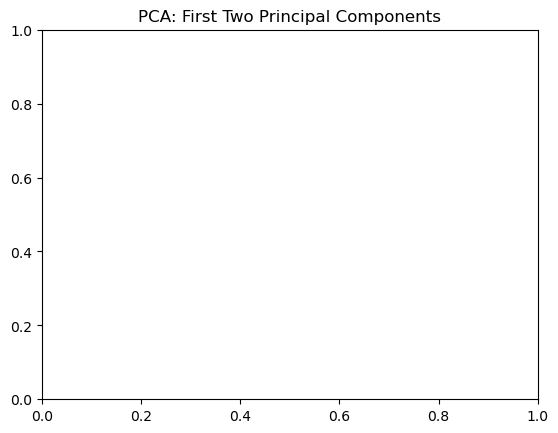

In [211]:
sns.scatterplot(x='PC1', y='PC2', hue='diagnosis', data=pca_df)
plt.title('PCA: First Two Principal Components')
plt.show()


In [212]:
 print(f"Explained Variance Ratios: {pca.explained_variance_ratio_}")


Explained Variance Ratios: [0.44272026 0.18971182]


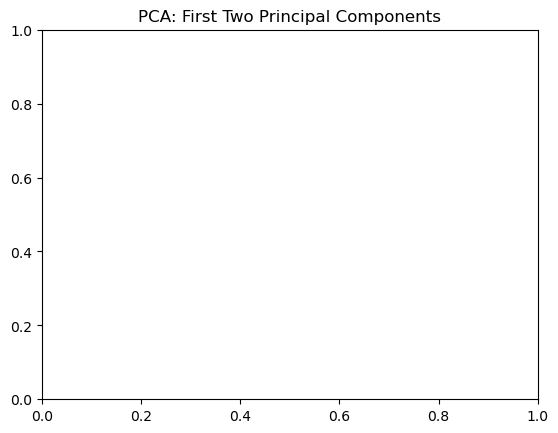

[0.98204467 0.01617649]


In [213]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 components
principal_components = pca.fit_transform(df.drop(columns=['diagnosis']))  # Exclude the target
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['diagnosis'] = df['diagnosis']

# Visualize
sns.scatterplot(x='PC1', y='PC2', hue='diagnosis', data=pca_df)
plt.title('PCA: First Two Principal Components')
plt.show()

# Check explained variance
print(pca.explained_variance_ratio_)


In [214]:
print(pca_df.head())
print(pca_df.describe())


           PC1         PC2  diagnosis
0  1160.142574 -293.917544        NaN
1  1269.122443   15.630182        NaN
2   995.793889   39.156743        NaN
3  -407.180803  -67.380320        NaN
4   930.341180  189.340742        NaN
                PC1           PC2  diagnosis
count  5.690000e+02  5.690000e+02        0.0
mean  -3.196818e-14 -5.034988e-14        NaN
std    6.661701e+02  8.549912e+01        NaN
min   -8.631423e+02 -6.715323e+02        NaN
25%   -4.361926e+02 -3.122763e+01        NaN
50%   -2.160549e+02 -3.821966e-01        NaN
75%    2.326157e+02  3.146797e+01        NaN
max    3.867178e+03  7.396209e+02        NaN


In [215]:
print(pca_df['diagnosis'].value_counts())


Series([], Name: count, dtype: int64)


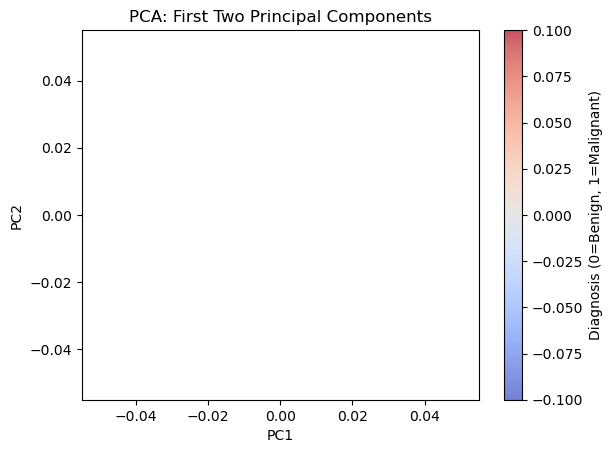

In [216]:
# Use plt.scatter to check visualization
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['diagnosis'], cmap='coolwarm', alpha=0.7)
plt.title('PCA: First Two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Diagnosis (0=Benign, 1=Malignant)')
plt.show()


In [217]:
print(f"Explained Variance Ratios: {pca.explained_variance_ratio_}")
print(f"Total Variance Explained: {sum(pca.explained_variance_ratio_):.2f}")


Explained Variance Ratios: [0.98204467 0.01617649]
Total Variance Explained: 1.00


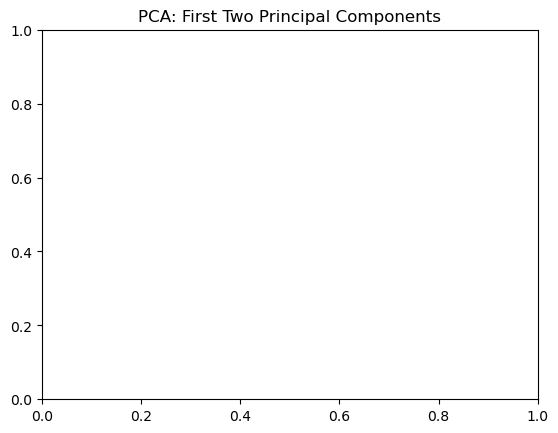

In [218]:
sns.scatterplot(x='PC1', y='PC2', hue='diagnosis', data=pca_df, s=100)
plt.title('PCA: First Two Principal Components')
plt.show()


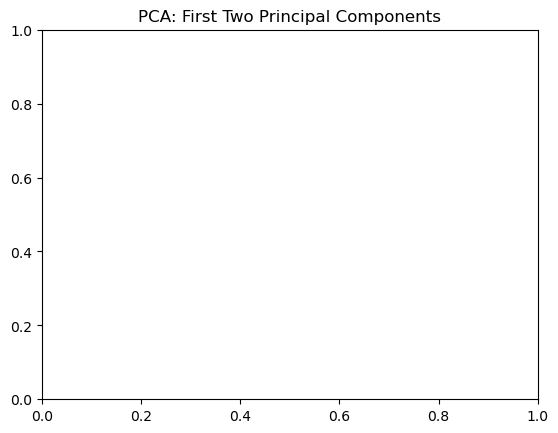

In [219]:
subset_df = pca_df.sample(100, random_state=42)  # Select 100 random samples
sns.scatterplot(x='PC1', y='PC2', hue='diagnosis', data=subset_df, s=100)
plt.title('PCA: First Two Principal Components')
plt.show()


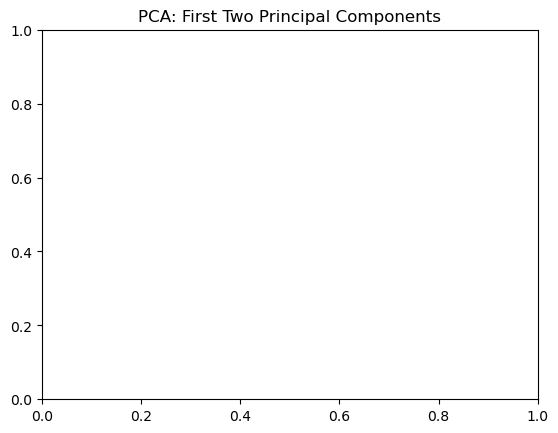

In [220]:
sns.set_palette('coolwarm')
sns.scatterplot(x='PC1', y='PC2', hue='diagnosis', data=pca_df)
plt.title('PCA: First Two Principal Components')
plt.show()


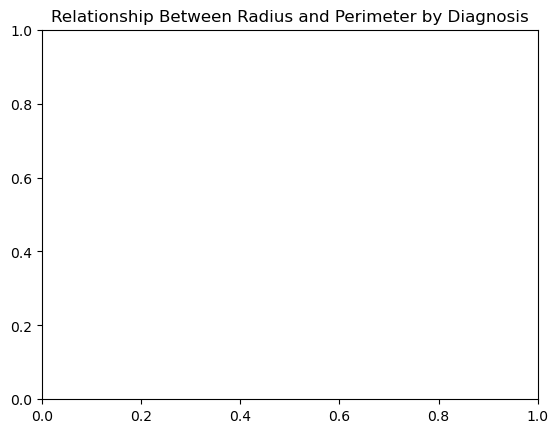

In [221]:
sns.scatterplot(x='radius_mean', y='perimeter_mean', hue='diagnosis', data=df)
plt.title('Relationship Between Radius and Perimeter by Diagnosis')
plt.show()


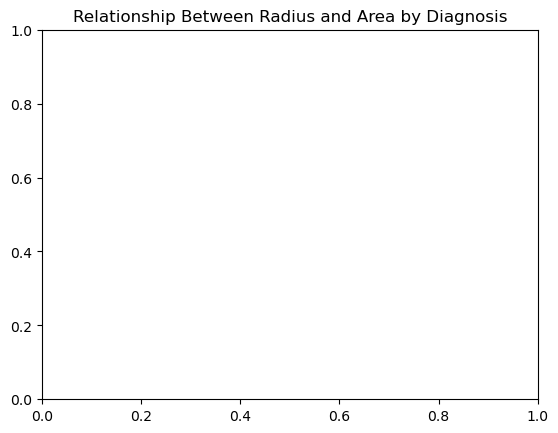

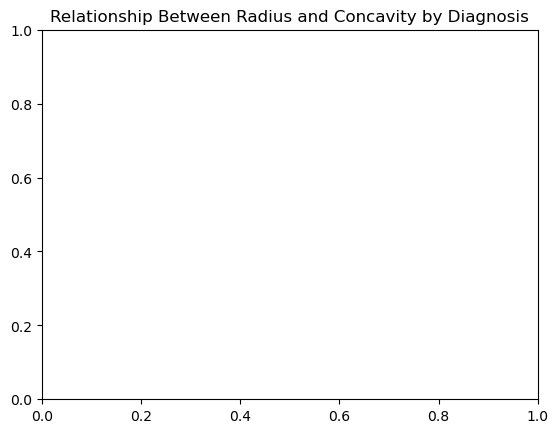

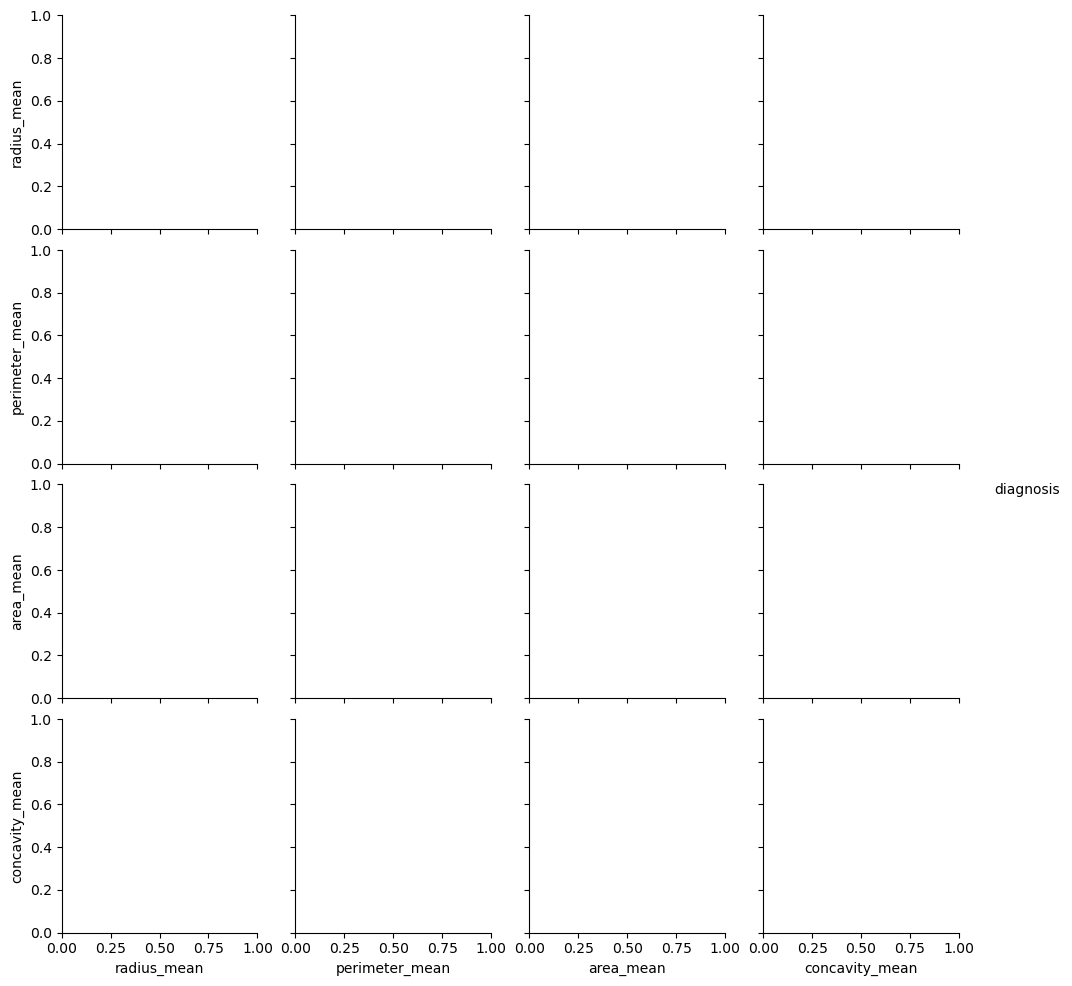

In [222]:
# Scatterplot for radius_mean vs. area_mean
sns.scatterplot(x='radius_mean', y='area_mean', hue='diagnosis', data=df)
plt.title('Relationship Between Radius and Area by Diagnosis')
plt.show()

# Scatterplot for radius_mean vs. concavity_mean
sns.scatterplot(x='radius_mean', y='concavity_mean', hue='diagnosis', data=df)
plt.title('Relationship Between Radius and Concavity by Diagnosis')
plt.show()

# Pairplot for multiple features
sns.pairplot(df, vars=['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean'], hue='diagnosis')
plt.show()


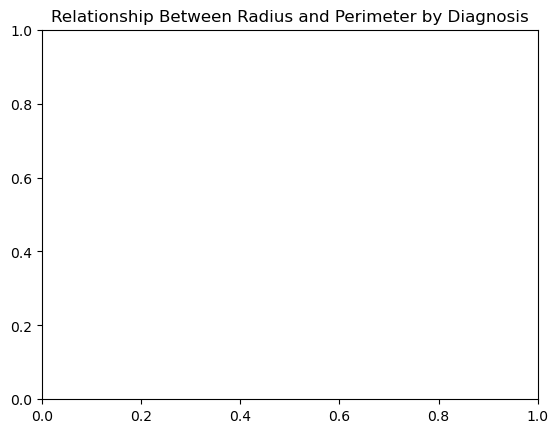

In [223]:
sns.scatterplot(x='radius_mean', y='perimeter_mean', hue='diagnosis', data=df)
plt.title('Relationship Between Radius and Perimeter by Diagnosis')
plt.show()


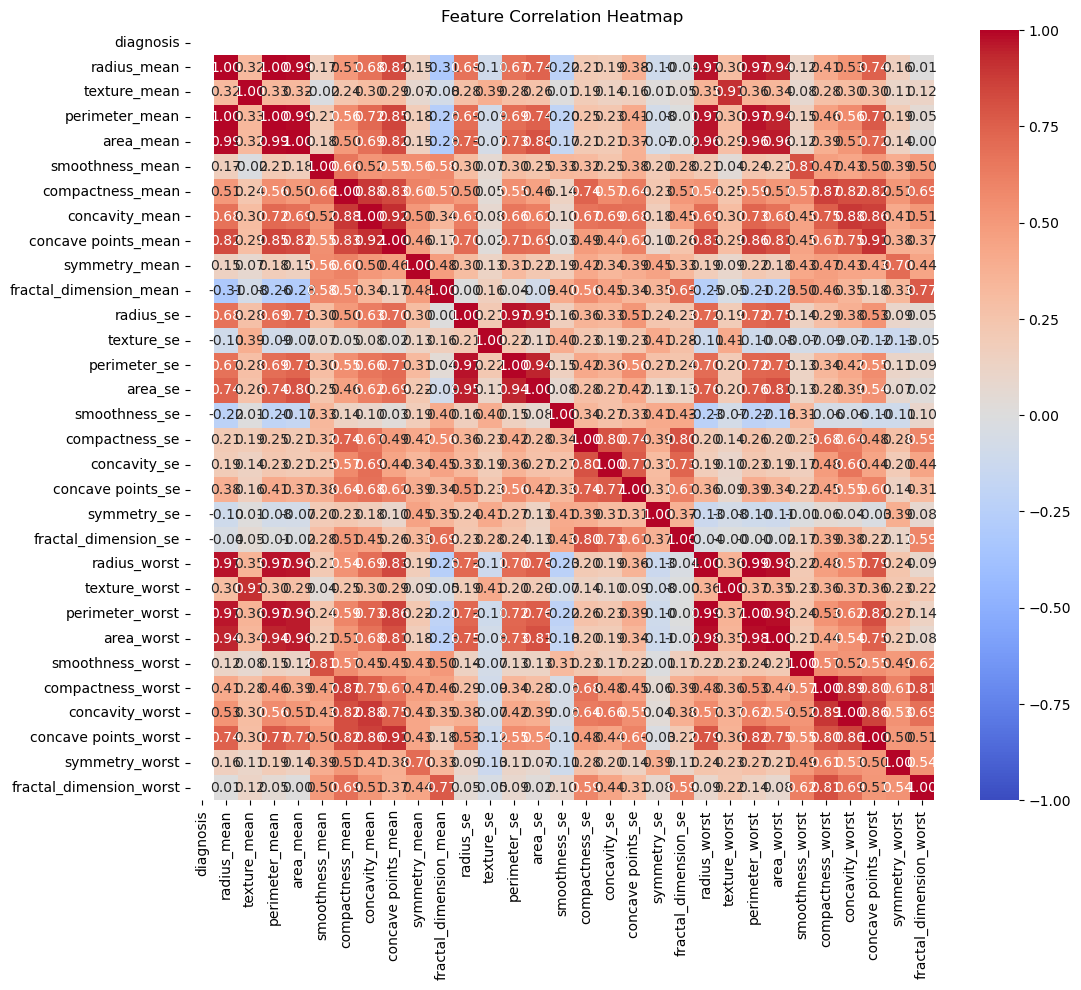

In [224]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = df[numeric_cols].corr()  # Compute correlation for numeric columns

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Feature Correlation Heatmap")
plt.show()


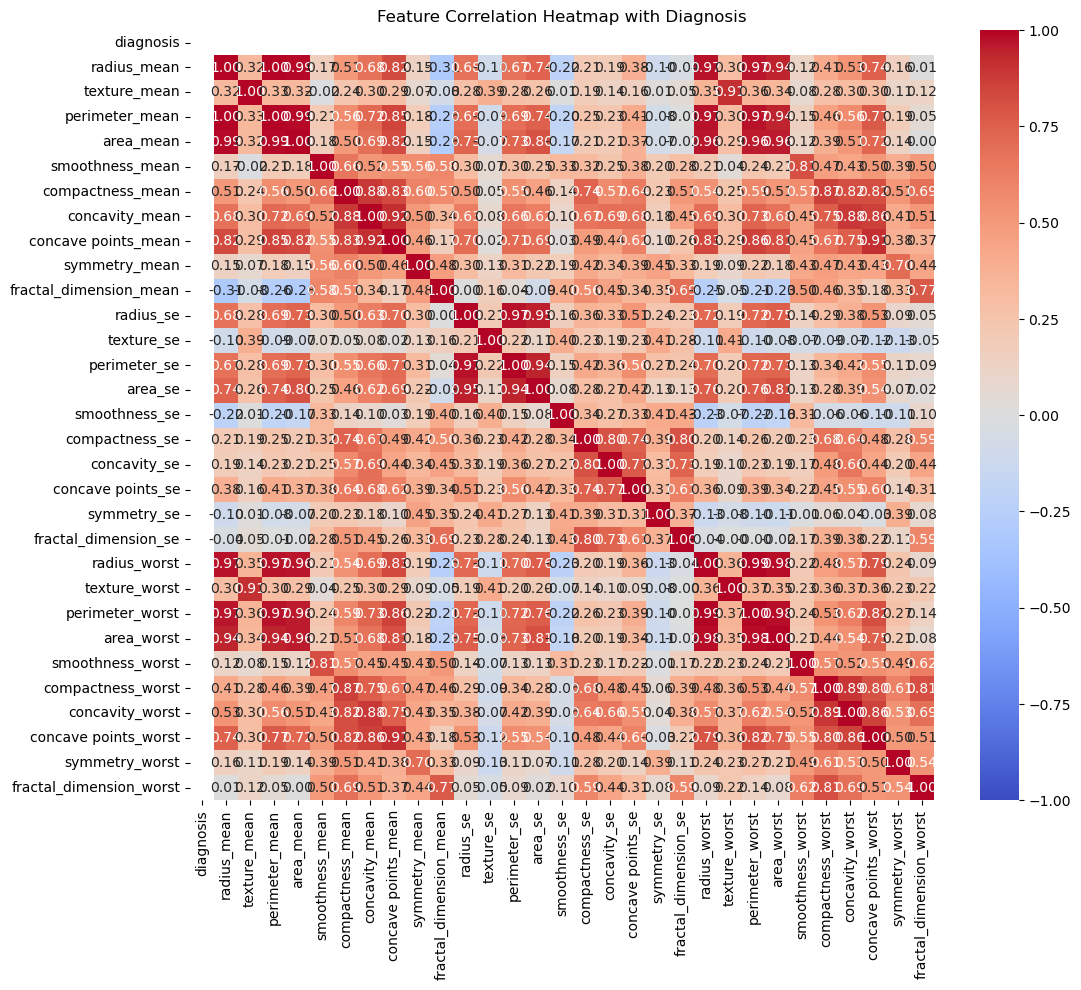

In [225]:
# Convert diagnosis to binary
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Now compute correlation with all columns
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Feature Correlation Heatmap with Diagnosis")
plt.show()


Number of Principal Components Retained: 10
Explained Variance Ratio: [0.44272026 0.18971182 0.09393163 0.06602135 0.05495768 0.04024522
 0.02250734 0.01588724 0.01389649 0.01168978]


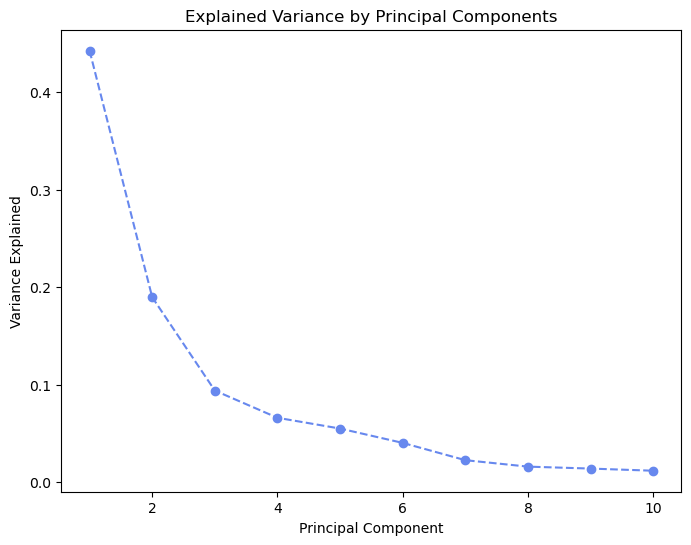

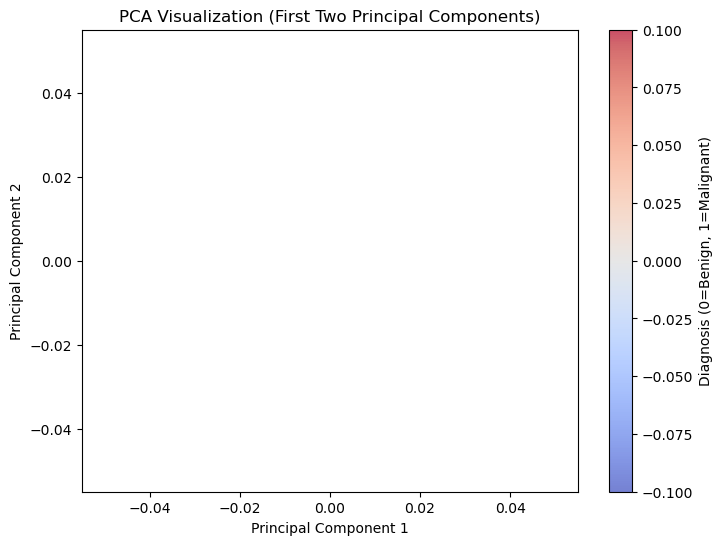

In [226]:
# Import necessary libraries
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load your dataset
df = pd.read_csv("/Users/yannkeita/Desktop/CapstoneProject/BrestCancer_Cleaned.csv")

# Step 2: Preprocessing
# Drop non-numeric columns if they exist (like 'id' or diagnosis if it's non-numeric)
if 'id' in df.columns:
    df = df.drop(columns=['id'])

# Convert 'diagnosis' to numeric (binary: 1 for malignant, 0 for benign)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Separate features and target
X = df.drop(columns=['diagnosis'])  # Features
y = df['diagnosis']  # Target

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply PCA
# Retain components that explain 95% of the variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# Step 4: Analyze PCA Output
# Number of components retained
print(f"Number of Principal Components Retained: {pca.n_components_}")
print(f"Explained Variance Ratio: {pca.explained_variance_ratio_}")

# Step 5: Visualization
# Plot the explained variance for each principal component
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

# Visualize the first two principal components
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', alpha=0.7)
plt.title('PCA Visualization (First Two Principal Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
cbar = plt.colorbar(scatter)  # Add the colorbar
cbar.set_label('Diagnosis (0=Benign, 1=Malignant)')  # Set colorbar label
plt.show()


# Step 6: Use X_pca for further modeling
# X_pca is the PCA-transformed dataset with reduced dimensions


      radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
PC1      0.218902      0.103725        0.227537   0.220995         0.142590   
PC2     -0.233857     -0.059706       -0.215181  -0.231077         0.186113   
PC3     -0.008531      0.064550       -0.009314   0.028700        -0.104292   
PC4      0.041409     -0.603050        0.041983   0.053434         0.159383   
PC5      0.037786     -0.049469        0.037375   0.010331        -0.365089   
PC6      0.018741     -0.032179        0.017308  -0.001888        -0.286374   
PC7     -0.124088      0.011400       -0.114477  -0.051653        -0.140669   
PC8     -0.007452      0.130675       -0.018687   0.034674        -0.288975   
PC9     -0.223110      0.112699       -0.223739  -0.195586         0.006425   
PC10     0.095486      0.240934        0.086386   0.074956        -0.069293   

      compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
PC1           0.239285        0.258400             0

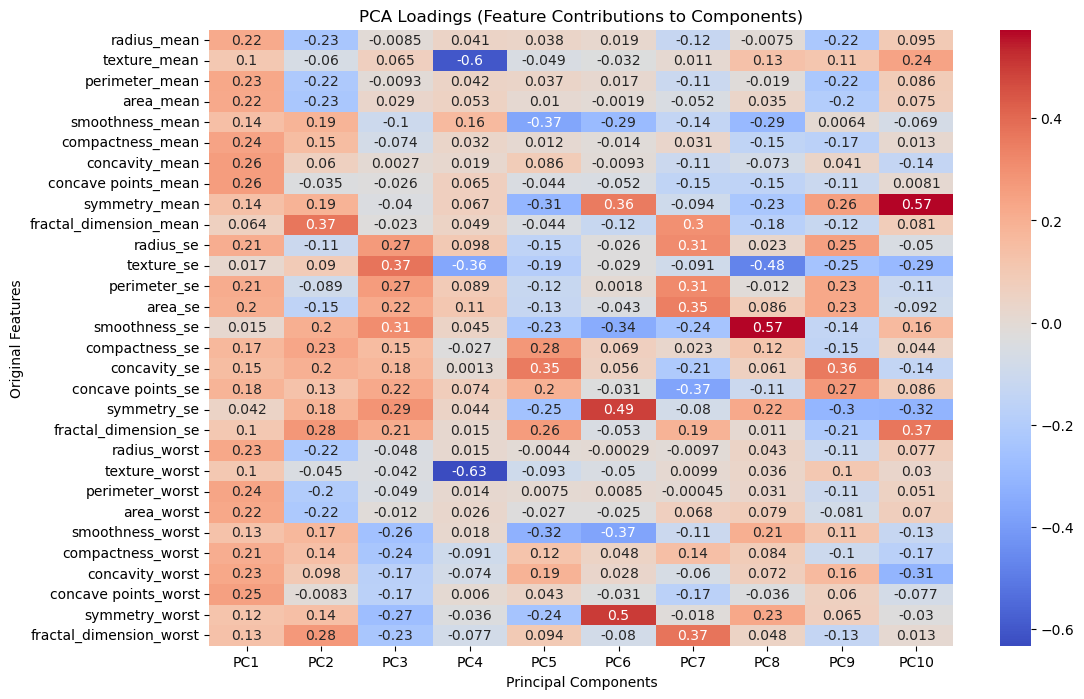

In [227]:
# Get PCA loadings
loadings = pd.DataFrame(pca.components_, columns=X.columns, index=[f'PC{i+1}' for i in range(pca.n_components_)])

# Display the loadings
print(loadings)

# Visualize loadings as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(loadings.T, cmap='coolwarm', annot=True)
plt.title('PCA Loadings (Feature Contributions to Components)')
plt.xlabel('Principal Components')
plt.ylabel('Original Features')
plt.show()


In [228]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [229]:
# Split PCA-transformed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)


In [230]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Support Vector Machine (SVM)
svm = SVC(kernel='linear', probability=True, random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)


ValueError: Input y contains NaN.

In [25]:
# Evaluate Logistic Regression
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_lr))
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.2f}")

# Evaluate Random Forest
print("\nRandom Forest Performance:")
print(classification_report(y_test, y_pred_rf))
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}")

# Evaluate SVM
print("\nSVM Performance:")
print(classification_report(y_test, y_pred_svm))
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.2f}")


Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Accuracy: 0.98

Random Forest Performance:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

Accuracy: 0.96

SVM Performance:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       

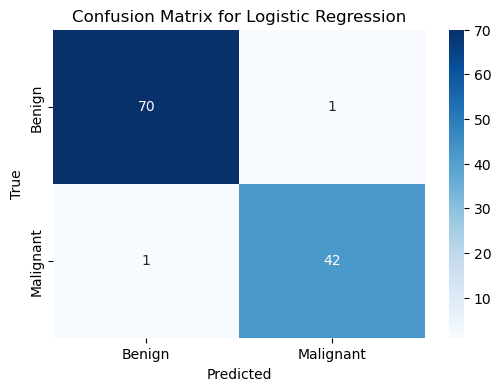

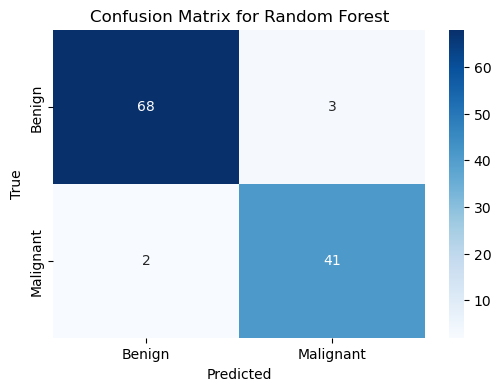

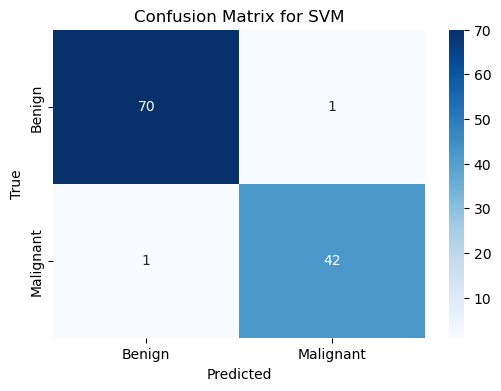

In [26]:
# Plot confusion matrices
models = {'Logistic Regression': y_pred_lr, 'Random Forest': y_pred_rf, 'SVM': y_pred_svm}
for model_name, y_pred in models.items():
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()


In [27]:
import joblib

# Save the Random Forest model as an example
joblib.dump(rf, 'random_forest_model.pkl')

# To load the model later
# rf_loaded = joblib.load('random_forest_model.pkl')


['random_forest_model.pkl']

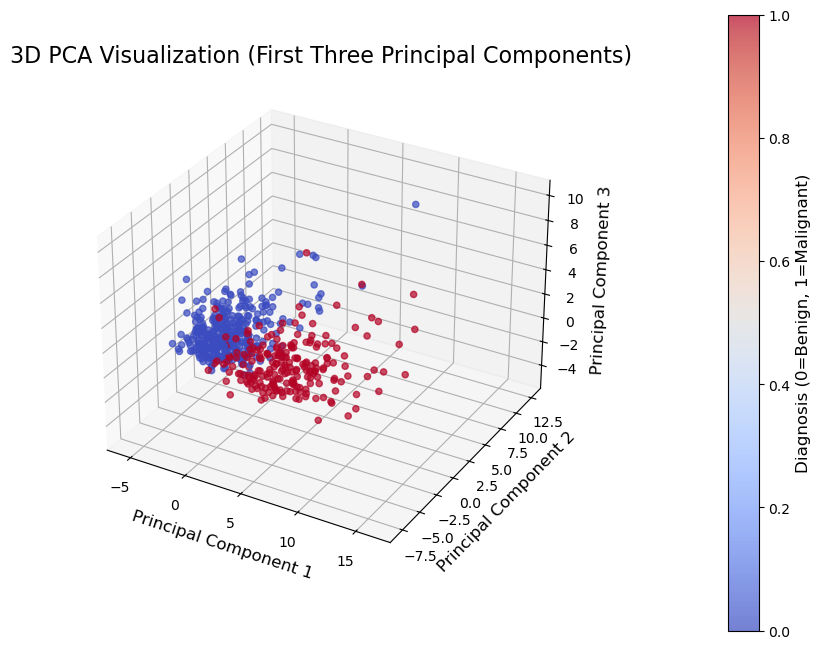

Explained Variance Ratios for PC1, PC2, and PC3:
[0.44272026 0.18971182 0.09393163]


In [28]:
# Import necessary libraries
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Step 1: Load the cleaned dataset
df = pd.read_csv("/Users/yannkeita/Desktop/CapstoneProject/BrestCancer_Cleaned.csv")

# Step 2: Preprocessing
# Drop non-numeric columns if they exist (like 'id')
if 'id' in df.columns:
    df = df.drop(columns=['id'])

# Convert 'diagnosis' to numeric (binary: 1 for malignant, 0 for benign)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Separate features and target
X = df.drop(columns=['diagnosis'])  # Features
y = df['diagnosis']  # Target

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply PCA
pca = PCA(n_components=3)  # Retain the first 3 components
X_pca_3d = pca.fit_transform(X_scaled)

# Step 4: Create a DataFrame for PCA-transformed data
pca_df_3d = pd.DataFrame(data=X_pca_3d, columns=['PC1', 'PC2', 'PC3'])
pca_df_3d['diagnosis'] = y

# Step 5: 3D Visualization
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the points
scatter = ax.scatter(
    pca_df_3d['PC1'],
    pca_df_3d['PC2'],
    pca_df_3d['PC3'],
    c=pca_df_3d['diagnosis'],
    cmap='coolwarm',
    alpha=0.7
)

# Add labels and title
ax.set_title('3D PCA Visualization (First Three Principal Components)', fontsize=16)
ax.set_xlabel('Principal Component 1', fontsize=12)
ax.set_ylabel('Principal Component 2', fontsize=12)
ax.set_zlabel('Principal Component 3', fontsize=12)

# Add color bar
colorbar = plt.colorbar(scatter, ax=ax, pad=0.2)
colorbar.set_label('Diagnosis (0=Benign, 1=Malignant)', fontsize=12)

plt.show()

# Step 6: Explained Variance of PC3
print("Explained Variance Ratios for PC1, PC2, and PC3:")
print(pca.explained_variance_ratio_)


Evaluating Models on Original Dataset (X_scaled):
Logistic Regression Performance on Original Dataset:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Accuracy: 0.97

Random Forest Performance on Original Dataset:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Accuracy: 0.96

SVM Performance on Original Dataset:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1      

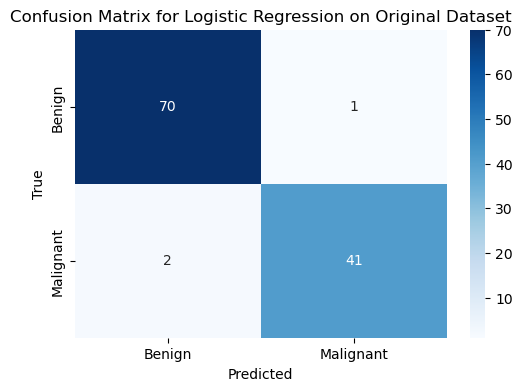

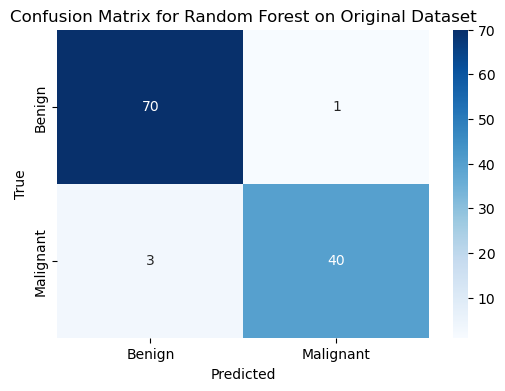

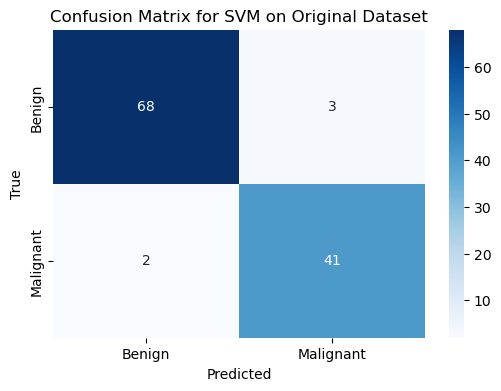


Evaluating Models on PCA Dataset (X_pca):
Logistic Regression Performance on PCA Dataset:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Accuracy: 0.98

Random Forest Performance on PCA Dataset:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

Accuracy: 0.96

SVM Performance on PCA Dataset:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0

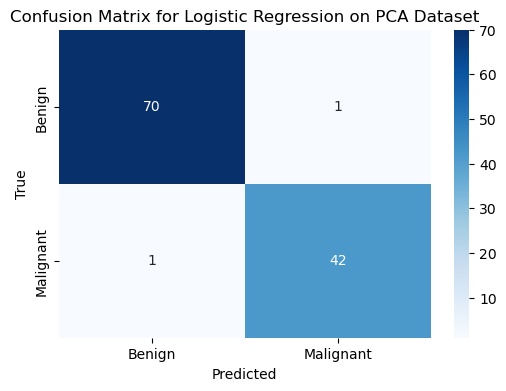

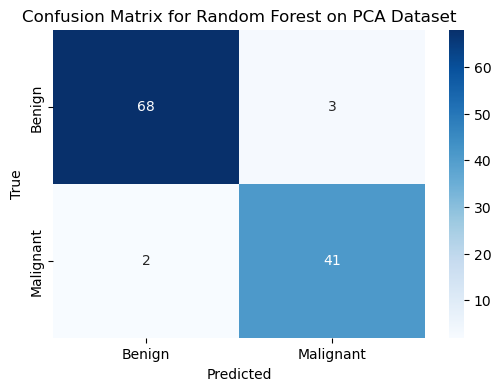

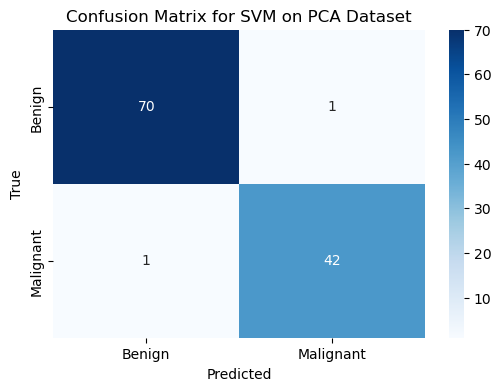

In [1]:
# Ensure the dataset is preprocessed
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load and preprocess the dataset
df = pd.read_csv("/Users/yannkeita/Desktop/CapstoneProject/BrestCancer_Cleaned.csv")

if 'id' in df.columns:
    df = df.drop(columns=['id'])

df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

X = df.drop(columns=['diagnosis'])  # Features
y = df['diagnosis']  # Target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split Original Dataset
X_train_original, X_test_original, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Split PCA Dataset
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)
X_train_pca, X_test_pca, _, _ = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Function to Train and Evaluate Models
def train_and_evaluate_models(X_train, X_test, y_train, y_test, dataset_name):
    # Logistic Regression
    lr = LogisticRegression()
    lr.fit(X_train, y_train)
    y_pred_lr = lr.predict(X_test)
    print(f"Logistic Regression Performance on {dataset_name}:")
    print(classification_report(y_test, y_pred_lr))
    print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.2f}")

    # Random Forest
    rf = RandomForestClassifier(random_state=42)
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)
    print(f"\nRandom Forest Performance on {dataset_name}:")
    print(classification_report(y_test, y_pred_rf))
    print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}")

    # SVM
    svm = SVC(kernel='linear', probability=True, random_state=42)
    svm.fit(X_train, y_train)
    y_pred_svm = svm.predict(X_test)
    print(f"\nSVM Performance on {dataset_name}:")
    print(classification_report(y_test, y_pred_svm))
    print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.2f}")

    # Plot Confusion Matrices
    models = {'Logistic Regression': y_pred_lr, 'Random Forest': y_pred_rf, 'SVM': y_pred_svm}
    for model_name, y_pred in models.items():
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(6, 4))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
        plt.title(f'Confusion Matrix for {model_name} on {dataset_name}')
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()

# Evaluate Models on Original Dataset
print("Evaluating Models on Original Dataset (X_scaled):")
train_and_evaluate_models(X_train_original, X_test_original, y_train, y_test, "Original Dataset")

# Evaluate Models on PCA Dataset
print("\nEvaluating Models on PCA Dataset (X_pca):")
train_and_evaluate_models(X_train_pca, X_test_pca, y_train, y_test, "PCA Dataset")


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Accuracy: 0.96


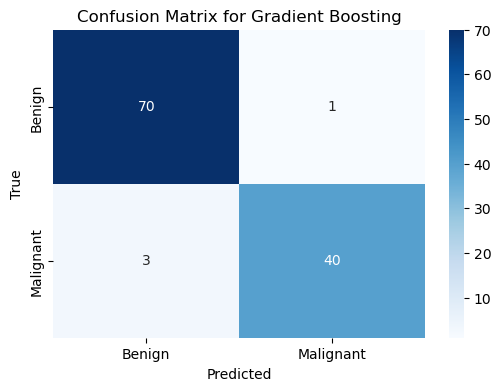

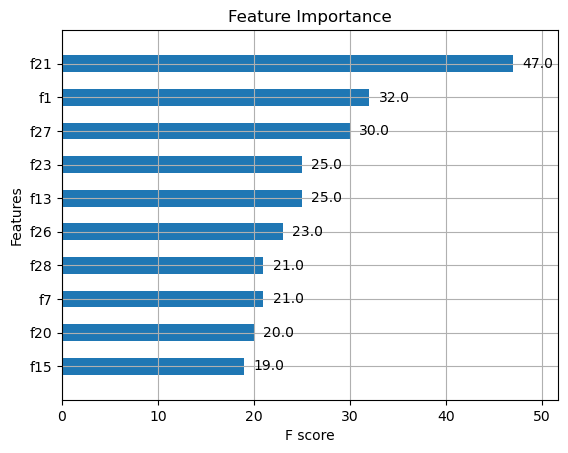

In [3]:
# Import required libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

# Load and preprocess the dataset
df = pd.read_csv("/Users/yannkeita/Desktop/CapstoneProject/BrestCancer_Cleaned.csv")
if 'id' in df.columns:
    df = df.drop(columns=['id'])
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
X = df.drop(columns=['diagnosis'])  # Features
y = df['diagnosis']  # Target

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train the Gradient Boosting model
model = xgb.XGBClassifier(
    n_estimators=100,        # Number of trees
    max_depth=3,             # Maximum depth of each tree
    learning_rate=0.1,       # Step size shrinkage
    subsample=0.8,           # Subsampling ratio for training data
    colsample_bytree=0.8,    # Subsampling ratio for columns
    random_state=42
)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix for Gradient Boosting')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Feature importance
xgb.plot_importance(model, importance_type='weight', title='Feature Importance', max_num_features=10, height=0.5)
plt.show()


In [4]:
# Assuming `X` was created from the cleaned `df` dataset without the 'diagnosis' column
feature_names = df.drop(columns=['diagnosis']).columns

# Map feature indices to their names
important_features = {'f21': feature_names[20], 'f1': feature_names[0], 'f27': feature_names[26]}

print("Feature Mapping:")
for feature, name in important_features.items():
    print(f"{feature}: {name}")


Feature Mapping:
f21: radius_worst
f1: radius_mean
f27: concavity_worst
